In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functions import *

# Data Exploration (and Cleaning)

In [22]:
url1 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_demo.txt'
url2 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_experiment_clients.txt'
url3 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_web_data_pt_1.txt'
url4 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_web_data_pt_2.txt'

df_final_demo = pd.read_csv(url1)
df_final_experiment_clients = pd.read_csv(url2)
df_web_data_1 = pd.read_csv(url3)
df_web_data_2 = pd.read_csv(url4)

### Check df_final_demo

In [23]:
data_summary(df_final_demo)

Number of columns -> 9
Number of rows -> 70609
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,70609,0,70609
clnt_tenure_yr,clnt_tenure_yr,float64,70595,14,54
clnt_tenure_mnth,clnt_tenure_mnth,float64,70595,14,482
clnt_age,clnt_age,float64,70594,15,165
gendr,gendr,object,70595,14,4
num_accts,num_accts,float64,70595,14,8
bal,bal,float64,70595,14,70328
calls_6_mnth,calls_6_mnth,float64,70595,14,8
logons_6_mnth,logons_6_mnth,float64,70595,14,9


There is some Null/Missing Values in all the columns and not the correct type in client_id

In [24]:
df_final_demo = rename_demo_columns(df_final_demo)

df_final_demo['client_id'] = df_final_demo['client_id'].astype(str)

In [25]:
# Search the rows with at least one null

null_id_demo = df_final_demo[df_final_demo.isna().any(axis=1)]

null_id_demo['client_id'] # For save the client_id with Nulls

4164     7402828
8316      355337
8677     8412164
9583     4666211
13444    2222915
18066    4876926
25961    5277910
28432    7616759
35323    8191345
43518    1227228
46076    8611797
47189    5144725
49846    1037867
63701    1618749
66219    6021001
Name: client_id, dtype: object

In [26]:
df_final_demo_drop_nulls = df_final_demo.dropna(thresh=2)

df_final_demo_drop_nulls[df_final_demo_drop_nulls.isna().any(axis=1)]

,client_id,seniority_per_years,seniority_per_months,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0


In [27]:
# Lets fill the NaN in age

df_final_demo_drop_nulls['age'] = df_final_demo_drop_nulls['age'].fillna(df_final_demo_drop_nulls['age'].mean())

data_summary(df_final_demo_drop_nulls)

Number of columns -> 9
Number of rows -> 70595
Number of duplicates -> 0


C:\Users\VSPC\AppData\Local\Temp\ipykernel_8428\1219698369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_demo_drop_nulls['age'] = df_final_demo_drop_nulls['age'].fillna(df_final_demo_drop_nulls['age'].mean())


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,object,70595,0,70595
seniority_per_years,seniority_per_years,float64,70595,0,54
seniority_per_months,seniority_per_months,float64,70595,0,482
age,age,float64,70595,0,166
gender,gender,object,70595,0,4
number_of_accounts,number_of_accounts,float64,70595,0,8
balance,balance,float64,70595,0,70328
calls_6_month,calls_6_month,float64,70595,0,8
logons_6_month,logons_6_month,float64,70595,0,9


In [28]:
# Create .csv cleaned

folder_path = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data'

file_path = folder_path + "/df_final_demo_cleanead.csv"

df_final_demo_drop_nulls.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")

File saved to: C:\Users\VSPC\Documents\GitHub\New-Web-Study\data/df_final_demo_cleanead.csv


In [29]:
# Check the general summary of num data

demo_cols_num = ['seniority_per_years', 'seniority_per_months', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month'] 
demo_cols_cat = ['gender']

df_final_demo_drop_nulls[demo_cols_num].describe()

,seniority_per_years,seniority_per_months,age,number_of_accounts,balance,calls_6_month,logons_6_month
count,70595.000000,70595.000000,70595.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,6.871819,82.089854,15.591162,0.534997,3.015087e+05,2.236580,2.353286
min,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


### Check web data (pt1 and pt2)

In [30]:
df_web_data_total = pd.concat([df_web_data_1, df_web_data_2], axis=0)

data_summary(df_web_data_total)

Number of columns -> 5
Number of rows -> 755405
Number of duplicates -> 10764


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,755405,0,120157
visitor_id,visitor_id,object,755405,0,130236
visit_id,visit_id,object,755405,0,158095
process_step,process_step,object,755405,0,5
date_time,date_time,object,755405,0,629363


date_time is an 'object' columns, when it should be a datetime type; at least 11k duplicates rows

In [31]:
df_web_data_total['client_id'] = df_web_data_total['client_id'].astype(str)

df_web_data_total['date_time'] = pd.to_datetime(df_web_data_total['date_time'])

In [32]:
# Divide 'date_time' in two columns: Date and Time

df_web_data_total['date'] = df_web_data_total['date_time'].dt.date
df_web_data_total['time'] = df_web_data_total['date_time'].dt.time


df_web_data_total.head(5)


,client_id,visitor_id,visit_id,process_step,date_time,date,time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


In [33]:
# We decided to drop the duplicate rows as we believe it may be due to a logging error (e.g. logging a double click)

df_web_data_total = df_web_data_total.drop_duplicates()

data_summary(df_web_data_total)

Number of columns -> 7
Number of rows -> 744641
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,object,744641,0,120157
visitor_id,visitor_id,object,744641,0,130236
visit_id,visit_id,object,744641,0,158095
process_step,process_step,object,744641,0,5
date_time,date_time,datetime64[ns],744641,0,629363
date,date,object,744641,0,98
time,time,object,744641,0,77640


In [34]:
folder_path = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data'

file_path = folder_path + "/df_web_data_total.csv"

df_web_data_total.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")

File saved to: C:\Users\VSPC\Documents\GitHub\New-Web-Study\data/df_web_data_total.csv


### Check experiment csv

In [35]:
data_summary(df_final_experiment_clients)

Number of columns -> 2
Number of rows -> 70609
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,70609,0,70609
Variation,Variation,object,50500,20109,2


In [36]:
# Create list with client_id for compare each df

list_id_final_demo = df_final_demo['client_id']

list_id_final_exp = df_final_experiment_clients['client_id']

common_clients_id = set(list_id_final_demo).intersection(set(list_id_final_exp))
demo_clients_id = set(list_id_final_demo).difference(set(list_id_final_exp))
exp_clients_id = set(list_id_final_exp).difference(set(list_id_final_demo))

{
    "Commons ID": len(common_clients_id),
    "Demo ID": len(demo_clients_id),
    "Exp ID": len(exp_clients_id)
}

{'Commons ID': 0, 'Demo ID': 70609, 'Exp ID': 70609}

We apply LightGBM for complete the dataset using clean dataframes.

In [37]:
url5 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\df_final_clients_data.csv'

df_final_data = pd.read_csv(url5)

data_summary(df_final_data)

Number of columns -> 16
Number of rows -> 443784
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,443784,0,70595
seniority_per_years,seniority_per_years,float64,443784,0,54
seniority_per_months,seniority_per_months,float64,443784,0,482
age,age,float64,443784,0,166
gender,gender,object,443784,0,4
number_of_accounts,number_of_accounts,float64,443784,0,8
balance,balance,float64,443784,0,70327
calls_6_month,calls_6_month,float64,443784,0,8
logons_6_month,logons_6_month,float64,443784,0,9
visitor_id,visitor_id,object,443784,0,78169


# EDA (Exploratory Data Analisys)

Dataframes:
- df_web_data_total
- df_final_demo_drop_nulls
- df_final_experiment_cleaned

## Demographics + Variation

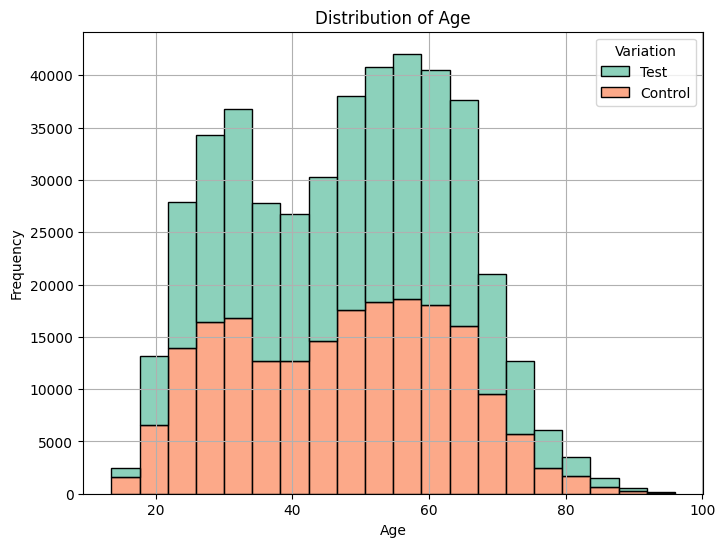

In [38]:
# 1. Distribution per age

plt.figure(figsize=(8,6))
sns.histplot(data=df_final_data, x='age', hue='Variation', bins=20, 
             palette='Set2', edgecolor='black', multiple='stack')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Hipo: It would be interesting to review the behavior of the youngest

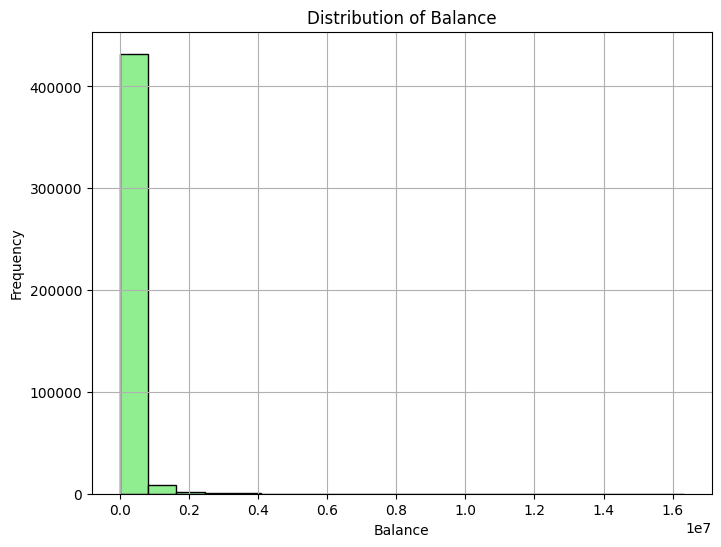

In [39]:
# Distribution per balance

plt.figure(figsize=(8, 6))
plt.hist(df_final_data['balance'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Not worth

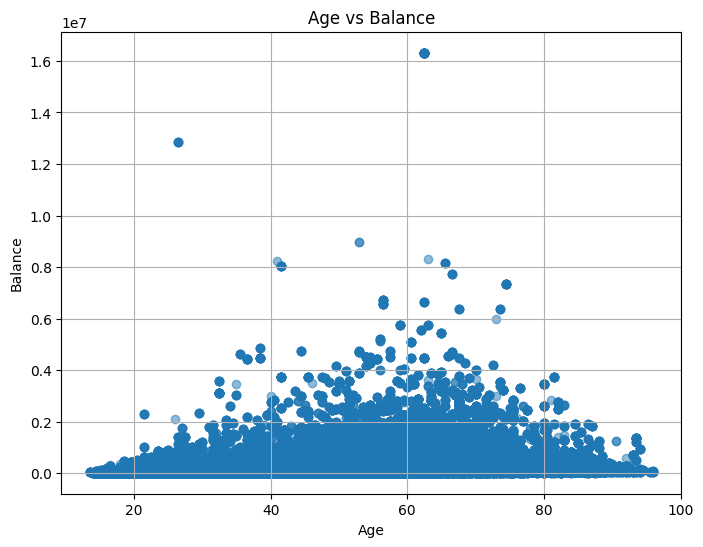

In [41]:
# Age and Balance

plt.figure(figsize=(8, 6))
plt.scatter(df_final_data['age'], df_final_data['balance'], alpha=0.5)
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

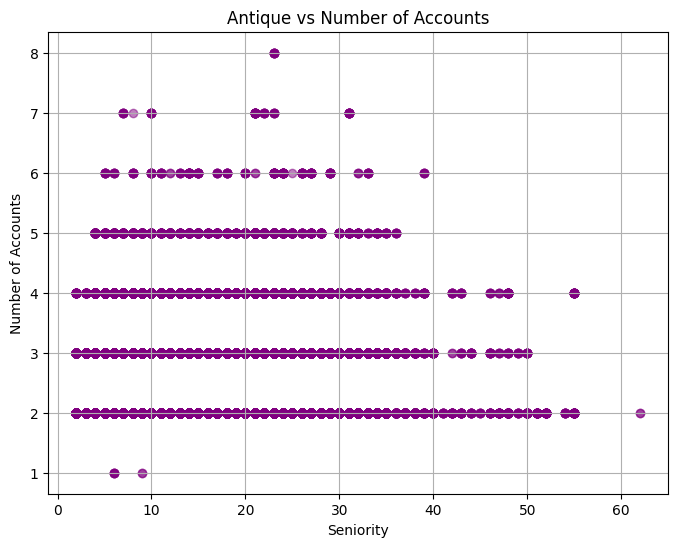

In [42]:
# seniority_per_yaer and number of acc
plt.figure(figsize=(8, 6))
plt.scatter(df_final_data['seniority_per_years'], df_final_data['number_of_accounts'], alpha=0.5, color='purple')
plt.title('Antique vs Number of Accounts')
plt.xlabel('Seniority')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.show()

#### Some views about the Variation groups

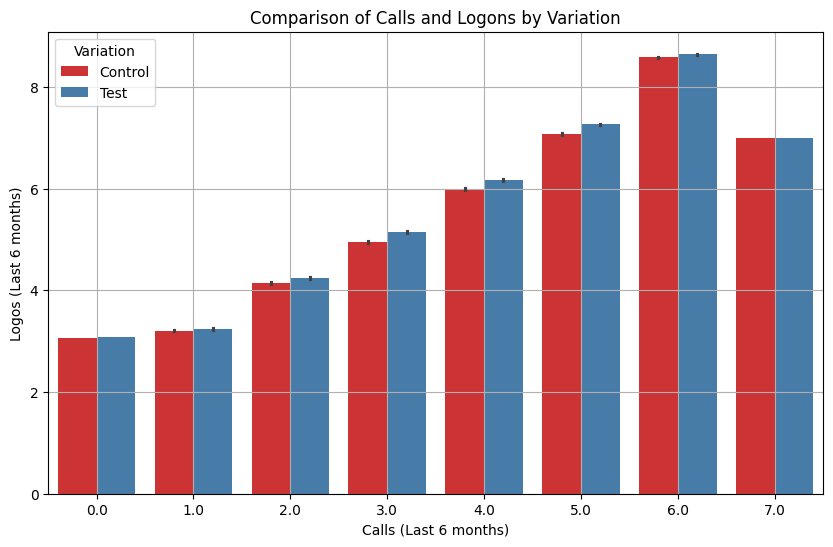

In [43]:
# Logons and calls last 6 months per group

plt.figure(figsize=(10, 6))
sns.barplot(data=df_final_data, 
            x='calls_6_month', 
            y='logons_6_month', 
            hue='Variation', 
            palette='Set1')
plt.title('Comparison of Calls and Logons by Variation')
plt.xlabel('Calls (Last 6 months)')
plt.ylabel('Logos (Last 6 months)')
plt.grid(True)
plt.show()



<Figure size 800x600 with 0 Axes>

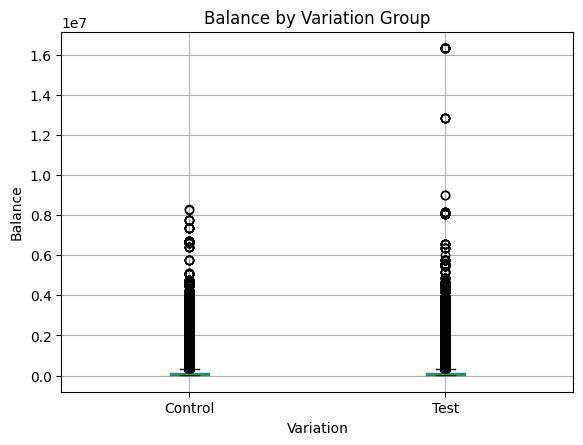

In [44]:
# Balance and Variation

plt.figure(figsize=(8, 6))
df_final_data.boxplot(column='balance', by='Variation')
plt.title('Balance by Variation Group')
plt.suptitle('') 
plt.xlabel('Variation')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

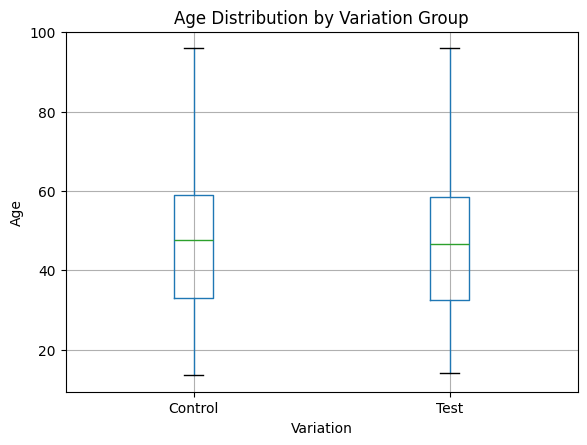

In [27]:
# Age and Variation
plt.figure(figsize=(8, 6))
df_final_data.boxplot(column='age', by='Variation')
plt.title('Age Distribution by Variation Group')
plt.suptitle('')
plt.xlabel('Variation')
plt.ylabel('Age')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

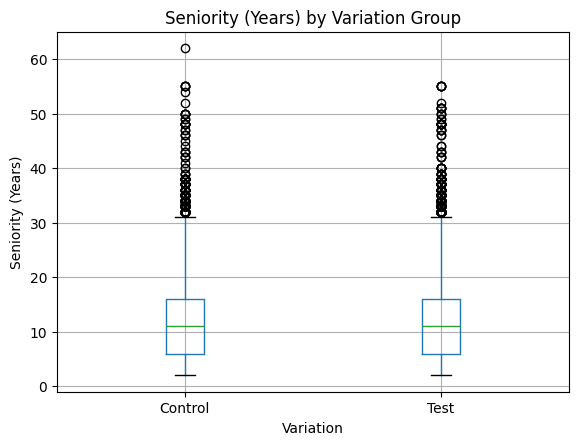

In [28]:
#Seniority and Variation

plt.figure(figsize=(8, 6))
df_final_data.boxplot(column='seniority_per_years', by='Variation')
plt.title('Seniority (Years) by Variation Group')
plt.suptitle('')
plt.xlabel('Variation')
plt.ylabel('Seniority (Years)')
plt.grid(True)
plt.show()

Poss conclusion: both Variation groups are, at least, equal

## Establish KPIs and observe different metrics

In [29]:
# Merge web_data and experiment

df_final_experiment_cleaned['client_id'] = df_final_experiment_cleaned['client_id'].astype(str)

merged_experiment_web_data = pd.merge(
    df_web_data_total,
    df_final_experiment_cleaned[['client_id', 'Variation']],
    on='client_id',
    how='inner'
)

data_summary(merged_experiment_web_data)

Number of columns -> 8
Number of rows -> 443897
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,object,443897,0,70609
visitor_id,visitor_id,object,443897,0,78187
visit_id,visit_id,object,443897,0,96773
process_step,process_step,object,443897,0,5
date_time,date_time,datetime64[ns],443897,0,384038
date,date,object,443897,0,98
time,time,object,443897,0,73342
Variation,Variation,object,443897,0,2


### Conversion rate and Dropout Rate

In [30]:
conversion_dropout_rate = calculate_conversion_n_dropout(merged_experiment_web_data)

conversion_dropout_rate

NameError: name 'step_counts' is not defined

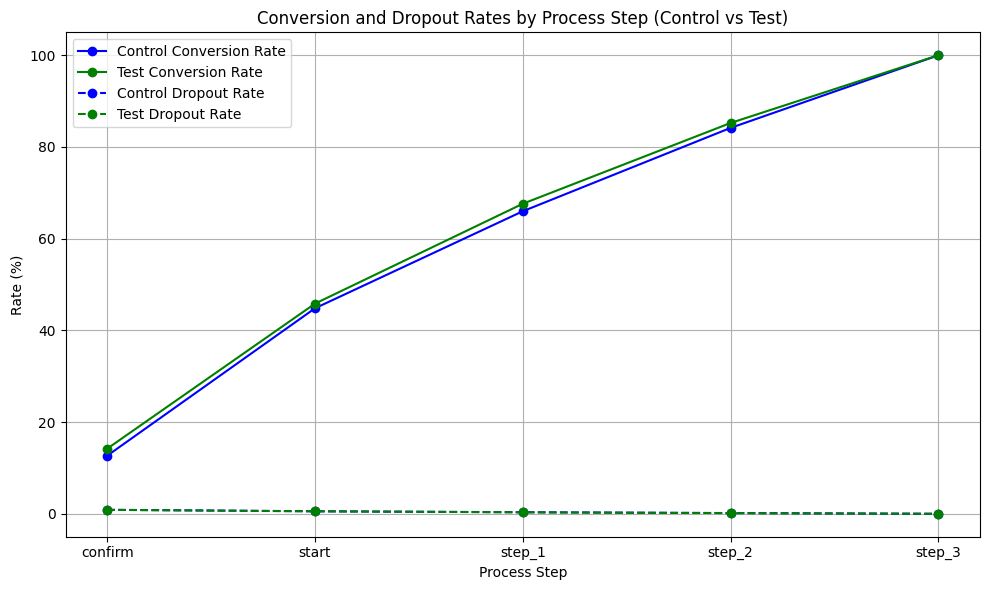

In [45]:
# Create a chart

plt.figure(figsize=(10, 6))
plt.plot(conversion_dropout_rate.index, conversion_dropout_rate['control_conversion_rate'], label='Control Conversion Rate', marker='o', linestyle='-', color='blue')
plt.plot(conversion_dropout_rate.index, conversion_dropout_rate['test_conversion_rate'], label='Test Conversion Rate', marker='o', linestyle='-', color='green')
plt.plot(conversion_dropout_rate.index, conversion_dropout_rate['control_dropout_rate'], label='Control Dropout Rate', marker='o', linestyle='--', color='blue')
plt.plot(conversion_dropout_rate.index, conversion_dropout_rate['test_dropout_rate'], label='Test Dropout Rate', marker='o', linestyle='--', color='green')
plt.xlabel('Process Step')
plt.ylabel('Rate (%)')
plt.title('Conversion and Dropout Rates by Process Step (Control vs Test)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

### Avg time per step

In [31]:
avg_time_per_step = calculate_avg_time_per_step(merged_experiment_web_data)

avg_time_per_step



,Control,Test
step 1,43.226906,40.900046
step 2,35.709649,36.228246
step 3,94.418243,95.261551
confirm,136.799959,143.167109
